# Aula 07 - Gradiente Descendente

# Exercício 01:


Use o gradiente descendente para encontrar o mínimo da função `foo_f`, que corresponde a:

$f(x,y) = (x+3)^2 + xy + y^2$.

Para isso, crie uma função foo_grad(), com esse nome e sem parâmetros que retorne uma __lista__ contendo dois elementos: o primeiro deve ser o mínimo da função com precisão de 4 casas decimais e o segundo deve ser o `theta`, uma tupla com os valores de $x$ e $y$ onde ocorre o mínimo, também com precisão de 4 casas decimais. Ou seja, o retorno da função deve ser `[f, (x', y')]`, onde f representa a função $f(x,y)$ nos pontos $x'$ e $y'$.

__Dica:__  
a função `round(var, n)` retorna o valor da variável `var` com uma precisão de `n` casas decimais.

In [1]:
def foo_f(theta):
    x, y = theta
    return (x+3)**2 + x*y + y**2

O gráfico dessa função é:

In [2]:
matplotlib inline

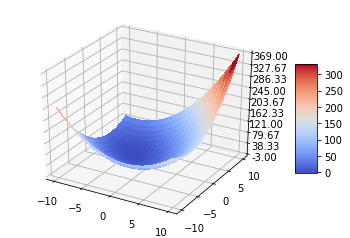

In [3]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')

X,Y=np.meshgrid(np.arange(-10,11),np.arange(-10,11))
theta=np.meshgrid(np.arange(-10,11),np.arange(-10,11))
Z = foo_f(theta)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [9]:
# YOUR CODE HERE

def minimize_batch(target_fn, gradient_fn, theta_0, tolerance=0.000001):
    step_sizes = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001]
    
    theta = theta_0                 # set theta to initial value
    target_fn = safe(target_fn)     # safe version of target_fn
    value = target_fn(theta)        # value we're minimizing

    while True:
        gradient = gradient_fn(theta)
        next_thetas = [step(theta, gradient, -step_size)
                       for step_size in step_sizes]
     
        # choose the one that minimizes the error function
        next_theta = min(next_thetas, key=target_fn)
        next_value = target_fn(next_theta)

        # stop if we're "converging"
        if abs(value - next_value) < tolerance:
            return theta
        else:
            theta, value = next_theta, next_value
            
def safe(f):
    def safe_f(*args, **kwargs):
        try:
            return f(*args, **kwargs)
        except:
            print("oops: ", args, "-", kwargs)
            return float('inf') # this means "infinity" in Python
    return safe_f

def step(v, direction, step_size):
    return [v_i + step_size * direction_i
            for v_i, direction_i in zip(v, direction)]

def grad_foo(theta):
    x,y = theta
    return [2 * x + y + 6, x + 2 * y]

x = 0
y = 0
theta = (x,y)

def foo_grad():
    x1, y1 = minimize_batch(foo_f, grad_foo, theta)
    min_grad = foo_f((x1,y1))
    return [round(min_grad,4), (round(x1,4),round(y1,4))]

foo_grad()

[-3.0, (-4.0008, 1.9992)]

# Exercício 02:

Há indícios de que a largura e o comprimento dos focinhos de cangurus cinzentos australianos estão linearmente relacionados, ou seja, seja `x` o comprimento do focinho, a largura `y` seria dada por:

$$y = \theta_1x + \theta_2$$

Neste exercício você deve encontrar os valores de $\theta$ que melhor explicam a relação entre `x` e `y`. Use dados reais de cangurus reportados no *Australian Journal of Zoology, Vol. 28, p607-613*, que podem ser baixados [aqui](http://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/slr07.html). Além disso, use o **gradiente descendente** para encontrar os melhores valores de $\theta$. Você pode usar qualquer uma das abordagens (`batch`, `mini_batch` ou `stochastic`) do gradiente descendente para resolver este problema. Por fim, plote um gráfico de dispersão (scatter plot) com os dados dos cangurus e a reta que melhor os explica.

**Gabarito**: os coeficientes $(\theta_1, \theta_2)$ têm os seguintes valores: `[0.2876, 46.4508]`.

**Extra**: resolva o problema usando mais de uma abordagem do gradiente descendente.

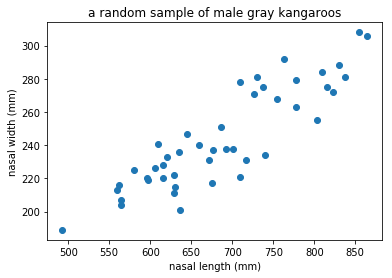

In [6]:
import csv
import matplotlib.pyplot as plt

#with open('data/gray-kangoroos.csv', newline='') as csvfile:
#    spamreader = csv.reader(csvfile, delimiter=',')
#    for row in spamreader:
#        print(', '.join(row))

X = list()
Y = list()
with open('data/gray-kangoroos.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        #print(row['X'], row['Y'])
        X.append(int(row['X']))
        Y.append(int(row['Y']))
        
plt.scatter(X, Y)


#Reference: Australian Journal of Zoology, Vol. 28, p607-613
#http://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/slr07.html
plt.title("a random sample of male gray kangaroos")
plt.xlabel("nasal length (mm)")
plt.ylabel("nasal width (mm)")
plt.show()        

In [39]:
'''
Neste exercício você deve encontrar os valores de θ que melhor explicam a relação entre x e y. 
Além disso, para encontrar os melhores valores de θ, use o procedimento minimize_stochastic (gradiente descendente estocástico).
'''

# YOUR CODE HERE
import csv
import random
import matplotlib.pyplot as plt

X = list()
Y = list()
with open('data/gray-kangoroos.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        #print(row['X'], row['Y'])
        X.append(int(row['X']))
        Y.append(int(row['Y']))

def minimize_batch(target_fn, gradient_fn, theta_0, tolerance=0.000001):
    step_sizes = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001]
    
    theta = theta_0                 # set theta to initial value
    target_fn = safe(target_fn)     # safe version of target_fn
    value = target_fn(theta)        # value we're minimizing

    while True:
        gradient = gradient_fn(theta)
        next_thetas = [step(theta, gradient, -step_size)
                       for step_size in step_sizes]
     
        # choose the one that minimizes the error function
        next_theta = min(next_thetas, key=target_fn)
        next_value = target_fn(next_theta)

        # stop if we're "converging"
        if abs(value - next_value) < tolerance:
            return theta
        else:
            theta, value = next_theta, next_value
            
def safe(f):
    def safe_f(*args, **kwargs):
        try:
            return f(*args, **kwargs)
        except:
            print("oops: ", args, "-", kwargs)
            return float('inf') # this means "infinity" in Python
    return safe_f

def step(v, direction, step_size):
    return [v_i + step_size * direction_i
            for v_i, direction_i in zip(v, direction)]
 
theta0 = [random.randint(0,20) for i in range(2)]

def calc_error(X,Y, theta):
    t1,t2 = theta
    return sum([(t1 * x + t2) - y for x,y in zip(X,Y)])

def square_error(X,Y,theta):
    return calc_error(X,Y,theta)**2
    
# não consegui terminar a questão, mesmo com explicação de outros eu não sei mais como prosseguir pra terminar a questão
# especialmente na parte de calcular a função de gradiente para a função de erro

In [32]:
'''
Plote um gráfico de dispersão (scatter plot) com os dados dos cangurus e a reta que melhor os explica.
'''

# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 